## India: Covid19 Effect on Air Pollution

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the City Day Data
city_day_df = pd.read_csv('../Data/city_day.csv')
city_day_df.head()

City        Date  PM2.5  PM10     NO    NO2    NOx  NH3     CO    SO2  \
0  Ahmedabad  2015-01-01    NaN   NaN   0.92  18.22  17.15  NaN   0.92  27.64   
1  Ahmedabad  2015-01-02    NaN   NaN   0.97  15.69  16.46  NaN   0.97  24.55   
2  Ahmedabad  2015-01-03    NaN   NaN  17.40  19.30  29.70  NaN  17.40  29.07   
3  Ahmedabad  2015-01-04    NaN   NaN   1.70  18.48  17.97  NaN   1.70  18.59   
4  Ahmedabad  2015-01-05    NaN   NaN  22.10  21.42  37.76  NaN  22.10  39.33   

       O3  Benzene  Toluene  Xylene  AQI AQI_Bucket  
0  133.36     0.00     0.02    0.00  NaN        NaN  
1   34.06     3.68     5.50    3.77  NaN        NaN  
2   30.70     6.80    16.40    2.25  NaN        NaN  
3   36.08     4.43    10.14    1.00  NaN        NaN  
4   39.31     7.01    18.89    2.78  NaN        NaN

In [3]:
# View basic information
city_day_df.shape

(29531, 16)

In [4]:
city_day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


### 1. Data Preparation and Feature Engineering

In [5]:
print(f"The Data is from {city_day_df['Date'].min()} to {city_day_df['Date'].max()}")

The Data is from 2015-01-01 to 2020-07-01


In [6]:
# The dataset has a lot of missing values. Let's ceate a data frame to show these and their percentage to total
def no_values_dframe(df):
    
    # Get all missing values from the dataset
    no_values = df.isnull().sum()
    
    # Calculate percentage of missing to total
    no_values_percent = np.round((no_values / len(df) * 100), 2)
    
    # Create a dataframe for the above results
    no_values_df = pd.concat([no_values, no_values_percent], axis = 1)
    
    # Rename the Data Frame columns (by default the coulmns are '0', '1'...)
    no_values_df = no_values_df.rename(
        columns = {0: 'Missing Values', 1: '% of Total'})
    
    # Sort the values (descending - % total) and remove the rows that have '0' missing values
    no_values_df = no_values_df[no_values_df.iloc[:,-1] != 0].sort_values('% of Total', ascending=False)
    
    # Return the Data Frame
    return no_values_df

In [7]:
city_no_values = no_values_dframe(city_day_df)
city_no_values.style.background_gradient(cmap='GnBu')

In [8]:
#TO-DO: Add section for imputing missing values (optional)

In [9]:
# Cities in the dataset
cities = city_day_df['City'].value_counts()
print(f'There are {len(cities)} cities in the dataset')
cities

There are 26 cities in the dataset


Delhi                 2009
Lucknow               2009
Bengaluru             2009
Mumbai                2009
Ahmedabad             2009
Chennai               2009
Hyderabad             2006
Patna                 1858
Gurugram              1679
Visakhapatnam         1462
Amritsar              1221
Jorapokhar            1169
Jaipur                1114
Thiruvananthapuram    1112
Amaravati              951
Brajrajnagar           938
Talcher                925
Kolkata                814
Guwahati               502
Coimbatore             386
Shillong               310
Chandigarh             304
Bhopal                 289
Kochi                  162
Ernakulam              162
Aizawl                 113
Name: City, dtype: int64

In [10]:
# Convert the Date column to datetime format
city_day_df['Date'] = pd.to_datetime(city_day_df['Date'])
city_day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   City        29531 non-null  object        
 1   Date        29531 non-null  datetime64[ns]
 2   PM2.5       24933 non-null  float64       
 3   PM10        18391 non-null  float64       
 4   NO          25949 non-null  float64       
 5   NO2         25946 non-null  float64       
 6   NOx         25346 non-null  float64       
 7   NH3         19203 non-null  float64       
 8   CO          27472 non-null  float64       
 9   SO2         25677 non-null  float64       
 10  O3          25509 non-null  float64       
 11  Benzene     23908 non-null  float64       
 12  Toluene     21490 non-null  float64       
 13  Xylene      11422 non-null  float64       
 14  AQI         24850 non-null  float64       
 15  AQI_Bucket  24850 non-null  object        
dtypes: datetime64[ns](1), 

In [11]:
# Extract the year, month from Date and store them in new columns
city_day_df['Year'] = pd.DatetimeIndex(city_day_df['Date']).year
city_day_df['Month'] = pd.DatetimeIndex(city_day_df['Date']).month
city_day_df.head()

City       Date  PM2.5  PM10     NO    NO2    NOx  NH3     CO    SO2  \
0  Ahmedabad 2015-01-01    NaN   NaN   0.92  18.22  17.15  NaN   0.92  27.64   
1  Ahmedabad 2015-01-02    NaN   NaN   0.97  15.69  16.46  NaN   0.97  24.55   
2  Ahmedabad 2015-01-03    NaN   NaN  17.40  19.30  29.70  NaN  17.40  29.07   
3  Ahmedabad 2015-01-04    NaN   NaN   1.70  18.48  17.97  NaN   1.70  18.59   
4  Ahmedabad 2015-01-05    NaN   NaN  22.10  21.42  37.76  NaN  22.10  39.33   

       O3  Benzene  Toluene  Xylene  AQI AQI_Bucket  Year  Month  
0  133.36     0.00     0.02    0.00  NaN        NaN  2015      1  
1   34.06     3.68     5.50    3.77  NaN        NaN  2015      1  
2   30.70     6.80    16.40    2.25  NaN        NaN  2015      1  
3   36.08     4.43    10.14    1.00  NaN        NaN  2015      1  
4   39.31     7.01    18.89    2.78  NaN        NaN  2015      1

In [12]:
# Combine Benzene, Toluene and Xylene into one column
city_day_df['BTX'] = city_day_df['Benzene'] + city_day_df['Toluene'] + city_day_df['Xylene']

# Drop the columns that are not required
city_day_df.drop(['Benzene', 'Toluene', 'Xylene'], axis = 1);

In [13]:
# Create a new list 'pollutants'
pollutants = ['PM2.5', 'PM10', 'NO2', 'CO', 'SO2', 'O3', 'BTX']

In [14]:
# Set Date as the index for the data frame
city_day_df.set_index('Date', inplace=True)

### 2. Data Visualization

#### 2.1 Visualize Yearly Pollutants Data

In [15]:
# Create a function to show pollutant-wise yearly plot
def show_year_plot(df, value, c):
    ax = df[value].plot(marker='.', c=c, linestyle='None', figsize=(15,5), alpha=0.3, legend=True)
    ax.set_xlabel('Year')
    ax.set_ylabel('ug / m3')

In [16]:
# Create a copy of the main data frame
df = city_day_df.copy()

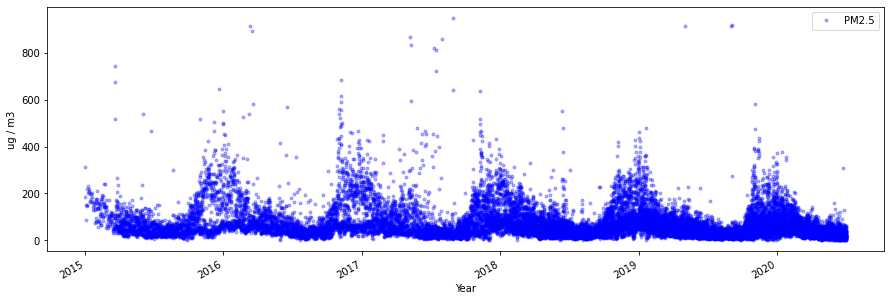

In [17]:
# Show plot for PM2.5
show_year_plot(df, 'PM2.5', 'b')

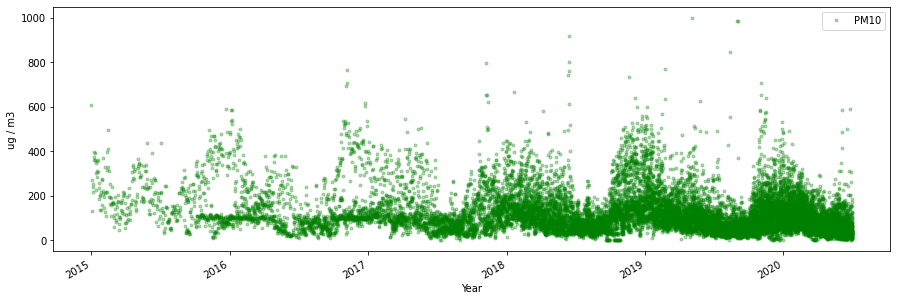

In [18]:
# Show plot for PM10
show_year_plot(df, 'PM10', 'g')

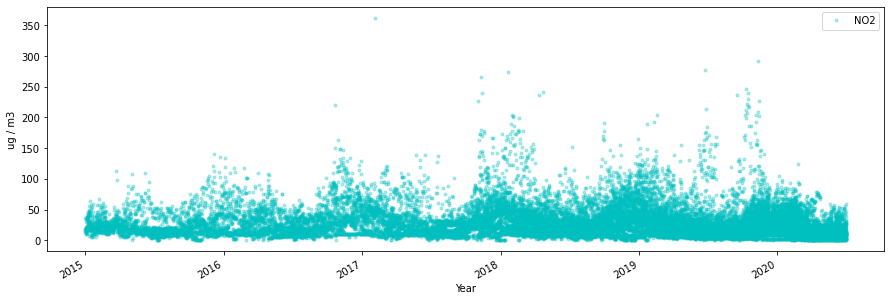

In [19]:
# Show plot for NO2
show_year_plot(df, 'NO2', 'c')

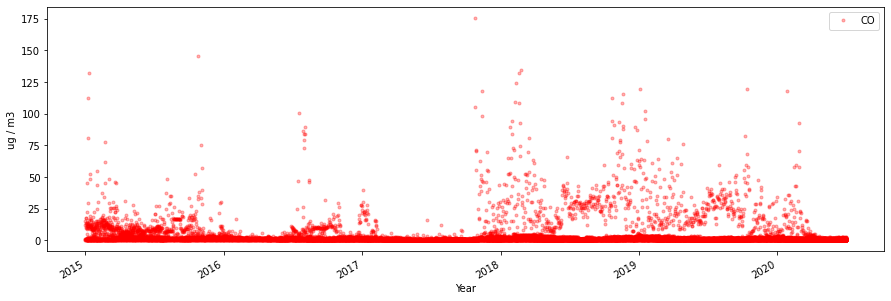

In [20]:
# Show plot for CO
show_year_plot(df, 'CO', 'r')

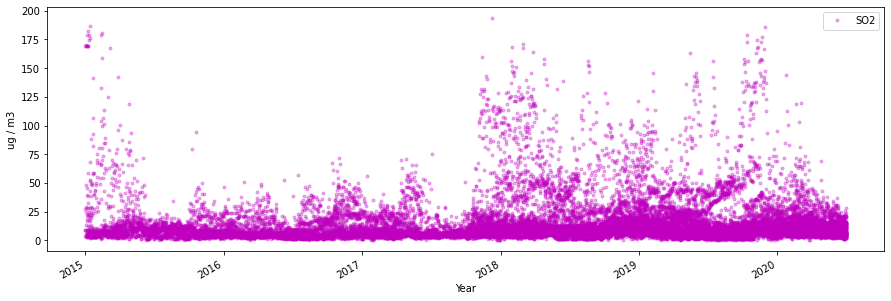

In [21]:
# Show plot for SO2
show_year_plot(df, 'SO2', 'm')

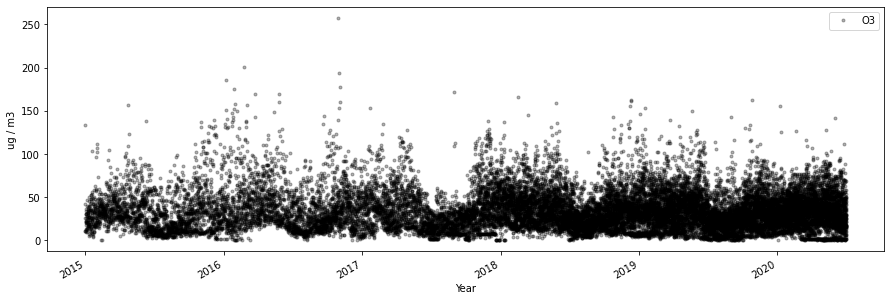

In [22]:
# Show plot for O3
show_year_plot(df, 'O3', 'k')

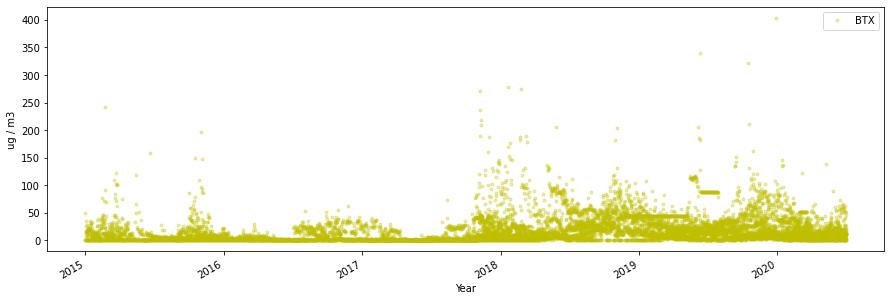

In [23]:
# Show plot for BTX
show_year_plot(df, 'BTX', 'y')

#### 2.2 Visualize Monthly (Seasonal) and Yearly (Trends) Distribution

In [24]:
# Define a function to show the plots
def show_trend_plot(value):
    sns.set_style('darkgrid')
    fig, axes = plt.subplots(1, 2, figsize=(15,5), dpi=80)
    
    sns.boxplot(x='Year', y=value, data=city_day_df, ax=axes[0])
    sns.pointplot(x='Month', y=value, data=city_day_df, ax=axes[1])

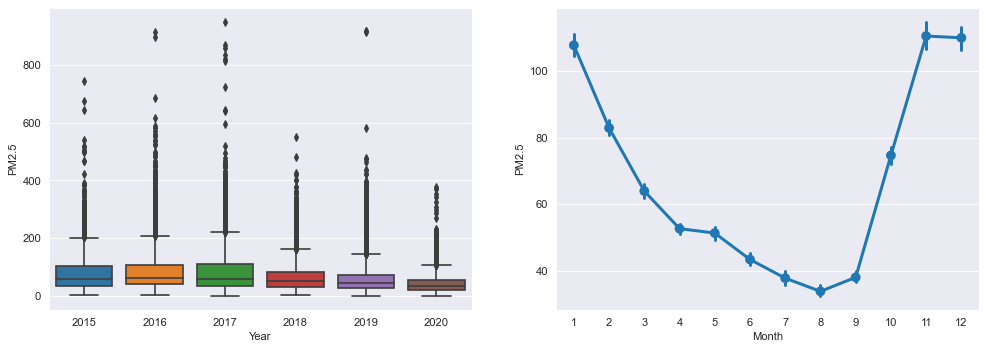

In [25]:
# Show plot for PM2.5
show_trend_plot('PM2.5')

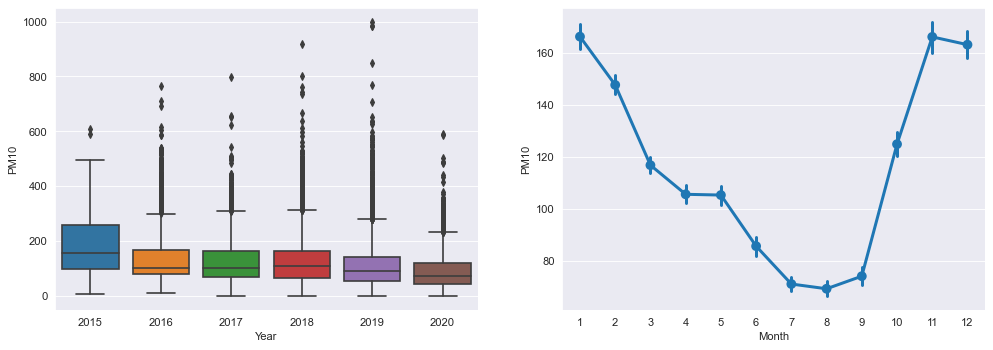

In [26]:
# Show plot for PM10
show_trend_plot('PM10')

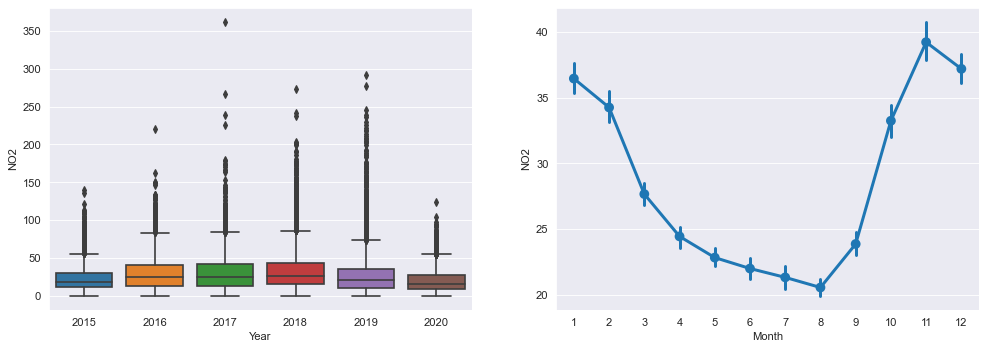

In [27]:
# Show plot for NO2
show_trend_plot('NO2')

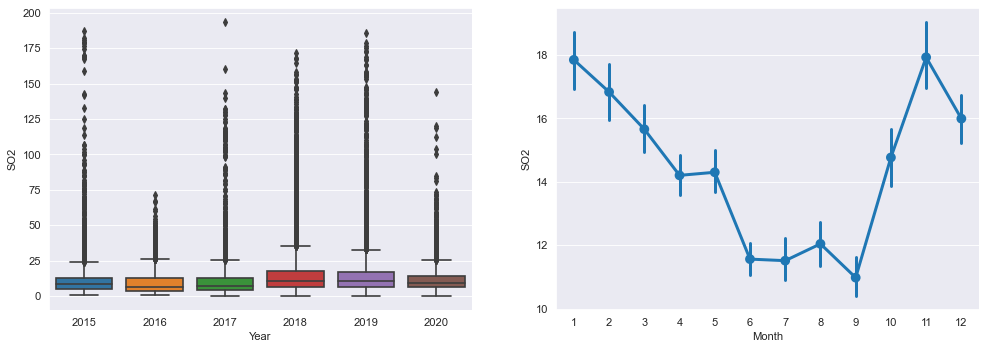

In [28]:
# Show plot for SO2
show_trend_plot('SO2')

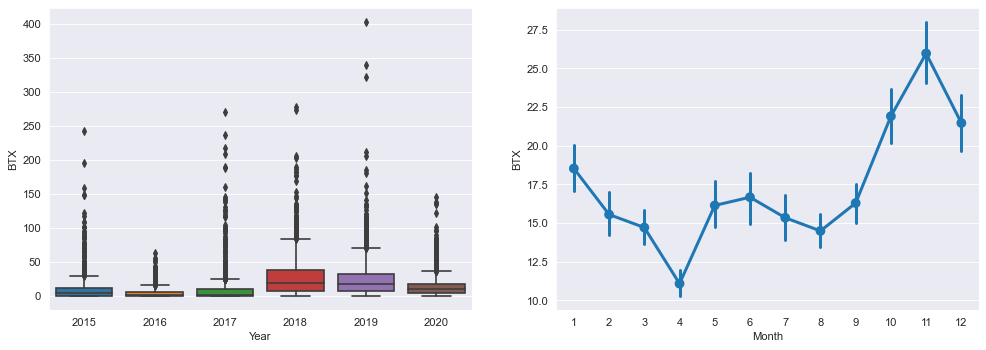

In [29]:
# Show plot for BTX
show_trend_plot('BTX')

### 2.3 The most polluted Cities of India

In [30]:
# Reset index for main data frame
city_day_df = city_day_df.reset_index()

In [31]:
# Create two functions - one to create a table of top 10 polluted cities and second to show a barplot
# Create a copy of the data frame first
df = city_day_df.copy()

In [32]:
def top_cities_df(pollutant):
    df1 = df[[pollutant, 'City']].groupby(['City']).mean().sort_values(by=pollutant, ascending=False).reset_index()
    return df1[:10].style.background_gradient(cmap='Oranges')

In [33]:
# Import plotly
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [34]:
def top_cities_bargraph(pollutant):
    df2 = df[[pollutant, 'City']].groupby(['City']).mean().sort_values(by=pollutant, ascending=False).reset_index()
    df3 = df2[:10]
    fig = make_subplots(
        rows=1, cols=1,
        column_width=[2],
        subplot_titles=(pollutant, ""))

    fig.add_trace(go.Bar(x=df3['City'], y=df3[pollutant], marker=dict(color=df3[pollutant], coloraxis="coloraxis")), 1, 1)
    fig.update_layout(coloraxis=dict(colorscale='Oranges'), showlegend=False,plot_bgcolor='white')
    fig.update_xaxes(ticks="outside", tickwidth=2,tickangle=45, tickcolor='crimson', ticklen=10,title_text="Cities")
    fig.update_yaxes(title_text="ug / m3", row=1, col=1)
    fig.show()

In [35]:
# Show Table and Graph for PM2.5
pm25 = top_cities_df('PM2.5')
pm25

In [36]:
top_cities_bargraph('PM2.5')

In [37]:
# Show table and graph for PM10
pm10 = top_cities_df('PM10')
pm10

In [38]:
top_cities_bargraph('PM10')

In [39]:
# Show table and graph for CO
co = top_cities_df('CO')
co

In [40]:
top_cities_bargraph('CO')

In [41]:
# Show table and graph for NO2
no2 = top_cities_df('NO2')
no2

In [42]:
top_cities_bargraph('NO2')

In [43]:
# Show table and graph for SO2
so2 = top_cities_df('SO2')
so2

In [44]:
top_cities_bargraph('SO2')

### 3. Effect of Covid19 Lockdown on AQI

#### 3.1 What is AQI?

#### 3.2 AQI across Indian Cities

In [45]:
# Cities that we will study - Ahmedabad, Delhi, Bengaluru, Hyderabad, Chennai, Patna, Mumbai
# Create a new dataframe that contains data after 1st January 2019
dated_city_df = city_day_df[city_day_df['Date'] >= '2019-01-01']
dated_city_df

Date           City   PM2.5   PM10      NO     NO2     NOx    NH3  \
1461  2019-01-01      Ahmedabad  110.71    NaN   63.03  111.56  100.04    NaN   
1462  2019-01-02      Ahmedabad  147.57    NaN   59.56  107.46  129.87    NaN   
1463  2019-01-03      Ahmedabad  131.50    NaN  119.68   75.82   88.04    NaN   
1464  2019-01-04      Ahmedabad  102.12    NaN   57.92   95.29   54.93    NaN   
1465  2019-01-05      Ahmedabad  115.00    NaN   63.86  111.04   61.99    NaN   
...          ...            ...     ...    ...     ...     ...     ...    ...   
29526 2020-06-27  Visakhapatnam   15.02  50.94    7.68   25.06   19.54  12.47   
29527 2020-06-28  Visakhapatnam   24.38  74.09    3.42   26.06   16.53  11.99   
29528 2020-06-29  Visakhapatnam   22.91  65.73    3.45   29.53   18.33  10.71   
29529 2020-06-30  Visakhapatnam   16.64  49.97    4.05   29.26   18.80  10.03   
29530 2020-07-01  Visakhapatnam   15.00  66.00    0.40   26.85   14.05   5.20   

           CO    SO2     O3  Benzene  Toluene  Xylene     AQI    AQI_Bucket  \
1461    63.03  80.15  57.12     4.08    32.33    6.93  1474.0        Severe   
1462    59.56  47.70  48.23     4.10    32.34    6.99  1246.0        Severe   
1463   119.68  55.29  43.25     4.09    32.42    7.00  1719.0        Severe   
1464    57.92  69.02  51.71     4.09    32.38    6.98  1264.0        Severe   
1465    63.86  86.65  59.25     4.12    32.43    6.97  1127.0        Severe   
...       ...    ...    ...      ...      ...     ...     ...           ...   
29526    0.47   8.55  23.30     2.24    12.07    0.73    41.0          Good   
29527    0.52  12.72  30.14     0.74     2.21    0.38    70.0  Satisfactory   
29528    0.48   8.42  30.96     0.01     0.01    0.00    68.0  Satisfactory   
29529    0.52   9.84  28.30     0.00     0.00    0.00    54.0  Satisfactory   
29530    0.59   2.10  17.05      NaN      NaN     NaN    50.0          Good   

       Year  Month    BTX  
1461   2019      1  43.34  
1462   2019      1  43.43  
1463   2019      1  43.51  
1464   2019      1  43.45  
1465   2019      1  43.52  
...     ...    ...    ...  
29526  2020      6  15.04  
29527  2020      6   3.33  
29528  2020      6   0.02  
29529  2020      6   0.00  
29530  2020      7    NaN  

[12092 rows x 19 columns]

In [46]:
# Create a list of cities
cities = ['Ahmedabad', 'Delhi', 'Bengaluru', 'Chennai', 'Hyderabad', 'Mumbai', 'Patna']

In [47]:
# Create an AQI Dataframe
AQI = dated_city_df[dated_city_df.City.isin(cities)][['Date', 'City', 'AQI', 'AQI_Bucket', 'Year', 'Month']]
AQI

Date       City     AQI    AQI_Bucket  Year  Month
1461  2019-01-01  Ahmedabad  1474.0        Severe  2019      1
1462  2019-01-02  Ahmedabad  1246.0        Severe  2019      1
1463  2019-01-03  Ahmedabad  1719.0        Severe  2019      1
1464  2019-01-04  Ahmedabad  1264.0        Severe  2019      1
1465  2019-01-05  Ahmedabad  1127.0        Severe  2019      1
...          ...        ...     ...           ...   ...    ...
25717 2020-06-27      Patna    65.0  Satisfactory  2020      6
25718 2020-06-28      Patna    82.0  Satisfactory  2020      6
25719 2020-06-29      Patna    88.0  Satisfactory  2020      6
25720 2020-06-30      Patna    93.0  Satisfactory  2020      6
25721 2020-07-01      Patna    98.0  Satisfactory  2020      7

[3836 rows x 6 columns]

In [48]:
# Create a function that takes city as value and creates a plot for that city? 
